In [1]:
import pandas as pd
import sweetviz
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\SDBI\4th Semester\Mashine Learning\Datasets\auto-mpg.csv")

In [3]:
analyze_df = sweetviz.analyze([df, "df"])
# then show 
analyze_df.show_html('analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


- We cannot use `car name`
- 1: America; 2: Europe; 3: Asia
- But we cannot use these as numbers because they are names of places, they are nominal by nature but by mapping number, we are forcing them to be ordinal
- to fix that, we will create a dummy data. (creating each category as binary as each column)
- We will be removing the 3rd column for making a reference bucket, so if both are zero we can predict it is true for the 3rd.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
df.horsepower.sum()

40952.0

In [9]:
medofhp = df.horsepower.median()

In [10]:
df.horsepower.fillna(medofhp, inplace= True)

In [11]:
df.horsepower.sum()

41513.0

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [13]:
df = df.drop('car name', axis = 1)

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<AxesSubplot:>

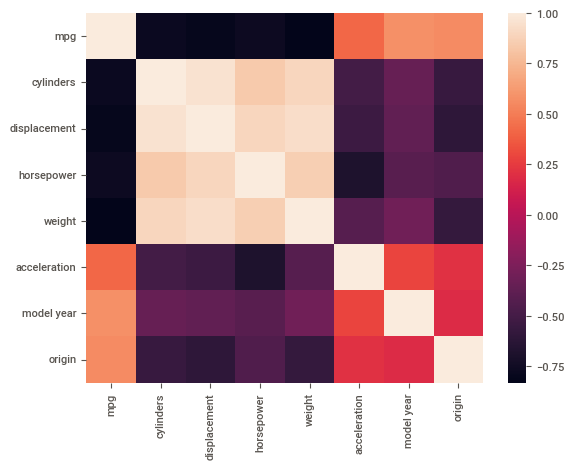

In [15]:
sns.heatmap(df.corr())

In [16]:
df['origin'] = df['origin'].replace({1:'america',2:'europe', 3:'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


In [17]:
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [18]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin_america',
 'origin_asia',
 'origin_europe']

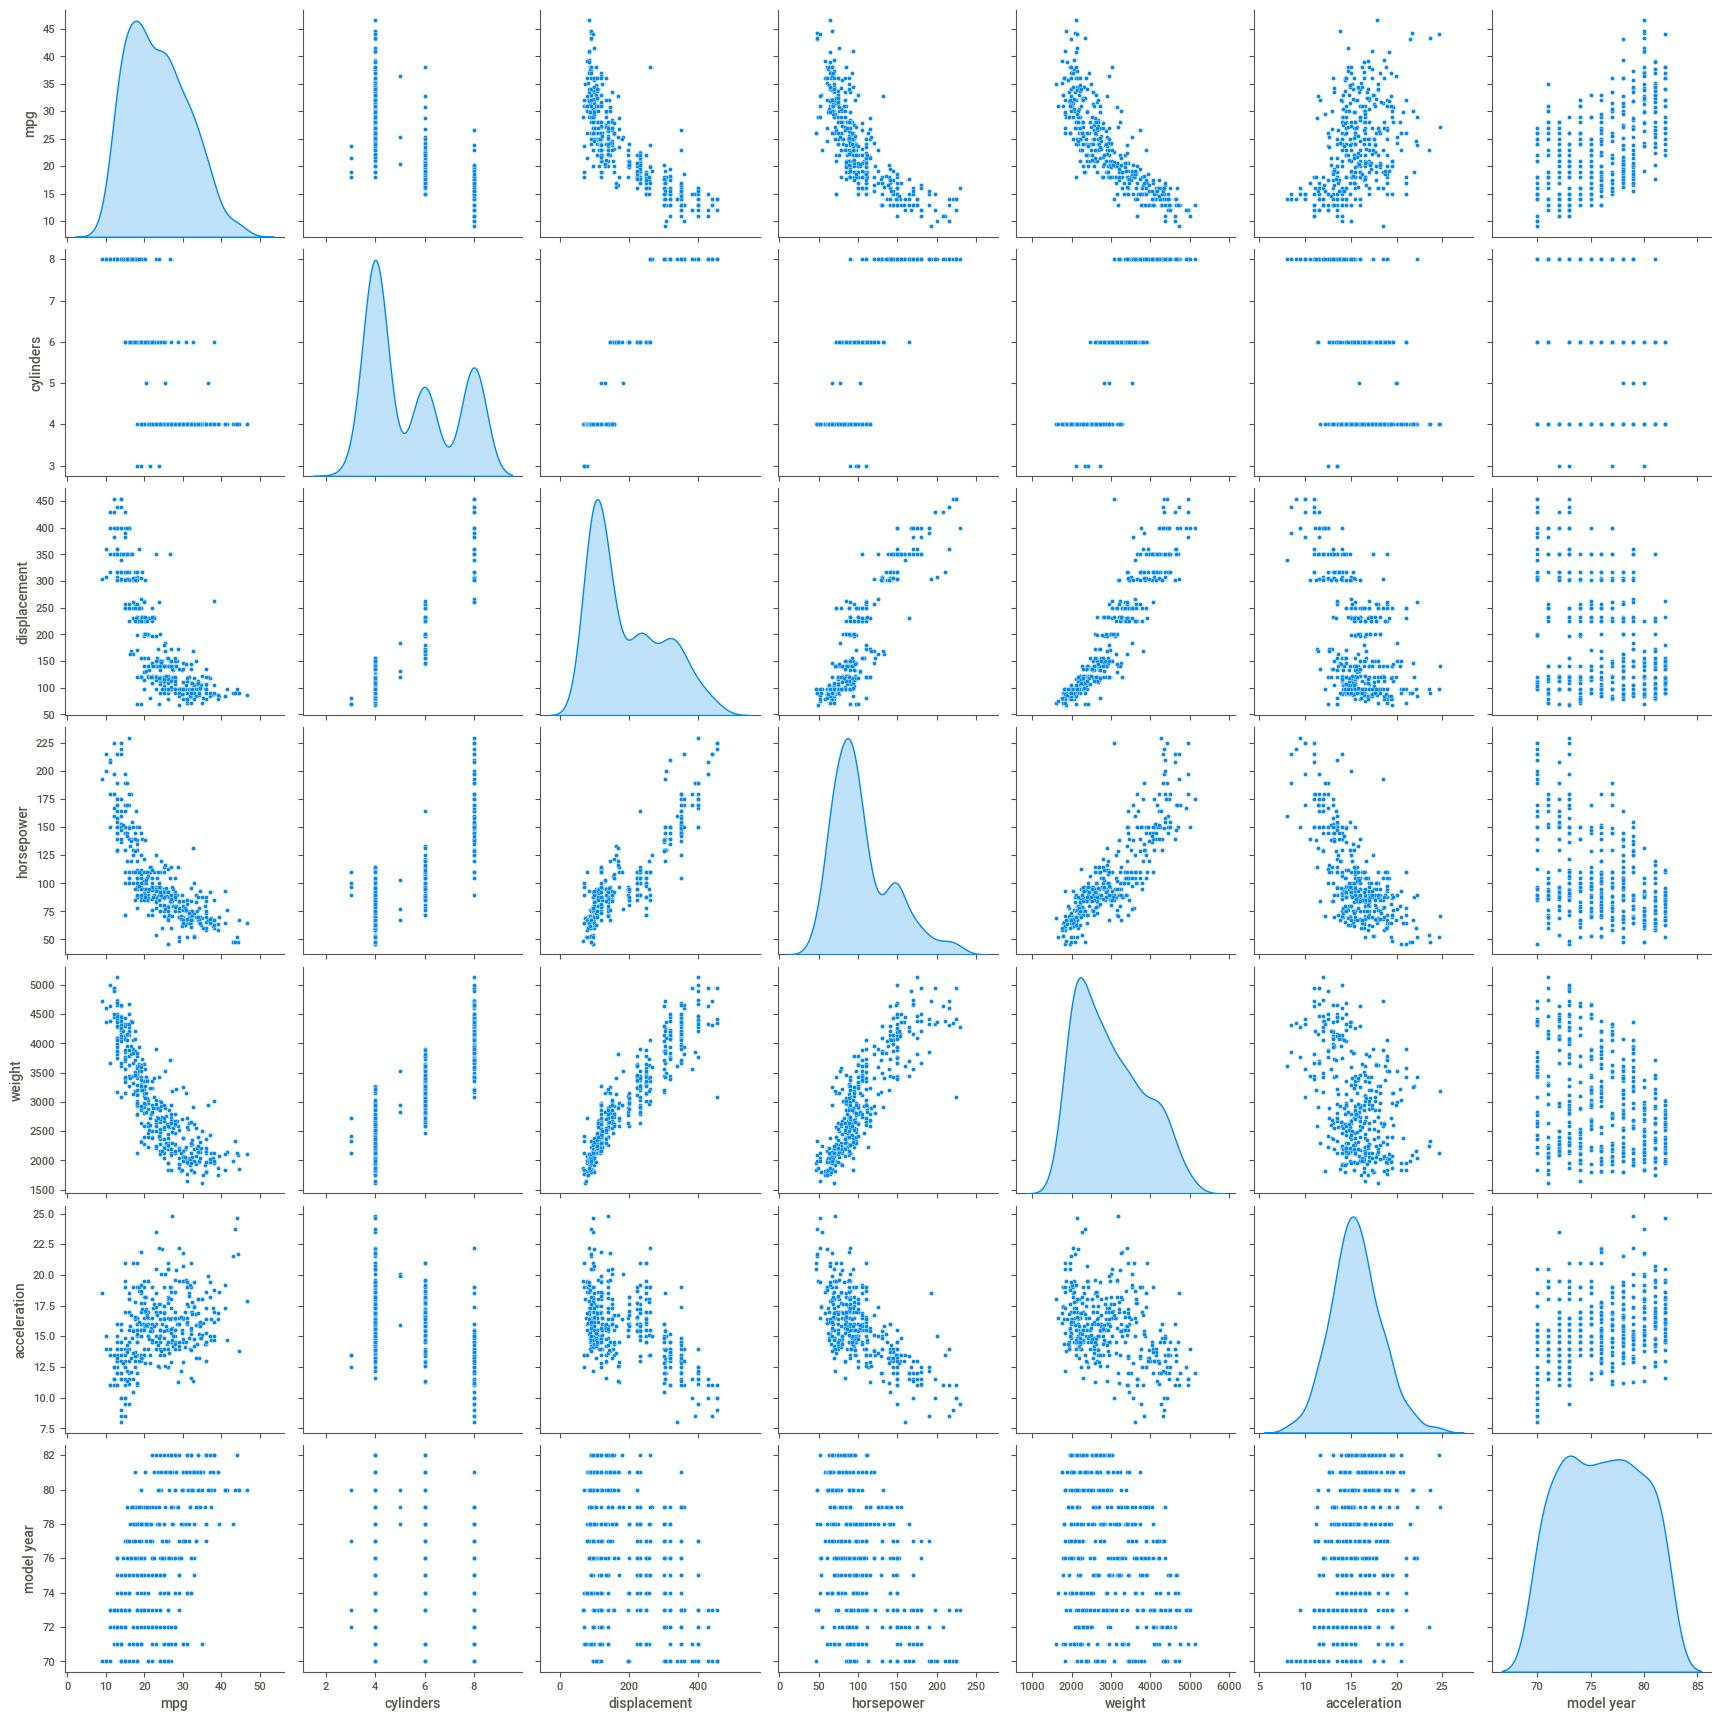

In [19]:
df_attr = df.iloc[:,0:7]
sns.pairplot(df_attr, diag_kind='kde')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['mpg','origin_europe'], axis=1)
y = df[['mpg']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size= 0.30,
                                                   random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [25]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, 
                                               reg_model.coef_[0][idx]))

The coefficient for cylinders is -0.3948079661648268
The coefficient for displacement is 0.028945510765487435
The coefficient for horsepower is -0.021752207723547294
The coefficient for weight is -0.0073520320651473455
The coefficient for acceleration is 0.06191936600761866
The coefficient for model year is 0.8369338917644994
The coefficient for origin_america is -3.001283000918515
The coefficient for origin_asia is -0.6060179643247389


In [26]:
print( "R-Sqaure value for training data ", 
reg_model.score(X_train, y_train) )
print( "R-Square value for test data ", reg_model.score(X_test,
y_test))


R-Sqaure value for training data  0.8141025501610559
R-Square value for test data  0.843313513280883


# Lasso

### Lasso - Reducing the number of variables

In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
for i , col in enumerate(X_train):
    print("Lasso model coefficient for {} is {} :".format(col,lasso.coef_[i]))

Lasso model coefficient for cylinders is -0.0 :
Lasso model coefficient for displacement is 0.016672993476228533 :
Lasso model coefficient for horsepower is -0.020987624311132016 :
Lasso model coefficient for weight is -0.007092754381227227 :
Lasso model coefficient for acceleration is 0.01776364802222895 :
Lasso model coefficient for model year is 0.8045987002489468 :
Lasso model coefficient for origin_america is -1.7549305695931086 :
Lasso model coefficient for origin_asia is -0.0 :


In [29]:
Lasso_perf = []
for i , col in [1,50,100]:
    lasso = Lasso(alpha = i)
    
    t1 = [i,lasso.score(X_train,y_train,lasso.score(X_test,y_test))]
    

TypeError: cannot unpack non-iterable int object

In [ ]:
s